In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.set_random_seed(777)

C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\Anaconda3\envs\su\lib\site-packages\tensorflow\python\framework\dtypes.

In [2]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [3]:
xy=pd.read_csv('winequality-red.csv')
xy.drop(xy.columns[[2,4,5,6,7,8,9]], axis='columns')
xy=xy.values
xy[:,:-1]=min_max_scaler(xy[:,:-1])
np.random.shuffle(xy)
test_line=int(len(xy)*0.7)
x_data=xy[:test_line,:-1]
y_data=xy[:test_line,[-1]] 
x_test=xy[test_line:,:-1]
y_test=xy[test_line:,[-1]] 

In [4]:
X = tf.placeholder(tf.float32, shape=[None, x_data.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([x_data.shape[1], 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
y_axis=[]
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
    print('Prediction data : ')
    for step in range(501):
        _, cost_val, hy_val = sess.run([train, cost, hypothesis], feed_dict={X: x_data, Y: y_data})
        y_axis.append(cost_val)
        print(hy_val)        
    print("Cost value : ", cost_val, "\n")

Prediction data : 
[[ 0.6378206 ]
 [ 0.80899584]
 [-0.04916158]
 ...
 [ 0.05023575]
 [-0.25712702]
 [ 0.09225419]]
[[2.8120089]
 [3.2330394]
 [2.1667953]
 ...
 [2.2848423]
 [1.7036575]
 [2.2024283]]
[[4.140699 ]
 [4.7104836]
 [3.5229068]
 ...
 [3.6543686]
 [2.9032187]
 [3.49229  ]]
[[4.9522514]
 [5.608981 ]
 [4.3530855]
 ...
 [4.49475  ]
 [3.6371794]
 [4.2804184]]
[[5.447507 ]
 [6.1534033]
 [4.8615694]
 ...
 [5.0114584]
 [4.0863557]
 [4.761671 ]]
[[5.7493076]
 [6.481293 ]
 [5.1732783]
 ...
 [5.3301725]
 [4.361344 ]
 [5.055231 ]]
[[5.9327908]
 [6.676777 ]
 [5.3646193]
 ...
 [5.5277615]
 [4.529788 ]
 [5.2339964]]
[[6.0439124]
 [6.7913113]
 [5.4823275]
 ...
 [5.6512423]
 [4.6330643]
 [5.342555 ]]
[[6.110782 ]
 [6.856367 ]
 [5.554987 ]
 ...
 [5.729373 ]
 [4.6964793]
 [5.408179 ]]
[[6.1505923]
 [6.891195 ]
 [5.600082 ]
 ...
 [5.7797446]
 [4.7355113]
 [5.447548 ]]
[[6.1738586]
 [6.907568 ]
 [5.6283064]
 ...
 [5.813115 ]
 [4.7596283]
 [5.4708652]]
[[6.1870136]
 [6.9126863]
 [5.646202 ]
 ...
 

[[5.916029 ]
 [5.685927 ]
 [5.7219353]
 ...
 [6.4540005]
 [4.8732047]
 [5.3272266]]
[[5.9149766]
 [5.682202 ]
 [5.7214947]
 ...
 [6.455513 ]
 [4.873553 ]
 [5.326707 ]]
[[5.91393  ]
 [5.678505 ]
 [5.7210503]
 ...
 [6.4570117]
 [4.8739   ]
 [5.326191 ]]
[[5.912888 ]
 [5.674835 ]
 [5.720602 ]
 ...
 [6.458497 ]
 [4.8742466]
 [5.3256783]]
[[5.9118514]
 [5.6711936]
 [5.7201495]
 ...
 [6.4599686]
 [4.8745923]
 [5.3251696]]
[[5.9108195]
 [5.6675787]
 [5.7196937]
 ...
 [6.4614277]
 [4.874937 ]
 [5.324664 ]]
[[5.909793 ]
 [5.6639915]
 [5.7192345]
 ...
 [6.4628735]
 [4.875282 ]
 [5.3241625]]
[[5.9087715]
 [5.660431 ]
 [5.718771 ]
 ...
 [6.464307 ]
 [4.8756256]
 [5.3236647]]
[[5.907755 ]
 [5.6568975]
 [5.718304 ]
 ...
 [6.4657264]
 [4.8759685]
 [5.3231697]]
[[5.906743 ]
 [5.65339  ]
 [5.7178335]
 ...
 [6.4671335]
 [4.876311 ]
 [5.3226786]]
[[5.905736 ]
 [5.6499095]
 [5.7173595]
 ...
 [6.4685283]
 [4.8766522]
 [5.3221908]]
[[5.904734 ]
 [5.6464553]
 [5.7168818]
 ...
 [6.46991  ]
 [4.876993 ]
 [5.32

[[5.8024836]
 [5.3581944]
 [5.6326756]
 ...
 [6.5760336]
 [4.917853 ]
 [5.2782574]]
[[5.8019314]
 [5.3570757]
 [5.631999 ]
 ...
 [6.576397 ]
 [4.9181123]
 [5.278057 ]]
[[5.801382 ]
 [5.3559675]
 [5.631323 ]
 ...
 [6.5767565]
 [4.918371 ]
 [5.2778587]]
[[5.8008347]
 [5.3548694]
 [5.630646 ]
 ...
 [6.577112 ]
 [4.9186296]
 [5.2776613]]
[[5.800289 ]
 [5.3537807]
 [5.629969 ]
 ...
 [6.5774636]
 [4.918887 ]
 [5.2774644]]
[[5.7997456]
 [5.3527026]
 [5.6292925]
 ...
 [6.577812 ]
 [4.9191446]
 [5.2772694]]
[[5.799205 ]
 [5.351634 ]
 [5.6286154]
 ...
 [6.5781565]
 [4.9194016]
 [5.2770753]]
[[5.7986655]
 [5.350576 ]
 [5.6279383]
 ...
 [6.5784974]
 [4.9196577]
 [5.276882 ]]
[[5.798128 ]
 [5.3495264]
 [5.627261 ]
 ...
 [6.578834 ]
 [4.9199133]
 [5.2766905]]
[[5.797593 ]
 [5.348487 ]
 [5.6265836]
 ...
 [6.5791674]
 [4.9201684]
 [5.2764993]]
[[5.79706  ]
 [5.347457 ]
 [5.625906 ]
 ...
 [6.5794973]
 [4.920423 ]
 [5.2763095]]
[[5.796529 ]
 [5.346437 ]
 [5.625229 ]
 ...
 [6.5798235]
 [4.920677 ]
 [5.27

<function matplotlib.pyplot.show(*args, **kw)>

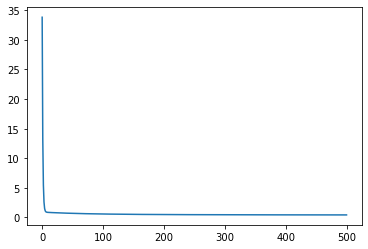

In [6]:
plt.plot(y_axis)
plt.show